# K-means Clustering

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# change working directory
%cd drive/My Drive/Colab Notebooks/Computer Vision Nanodegree/CVND_Exercises/1_3_Types_of_Features_Image_Segmentation

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Computer Vision Nanodegree/CVND_Exercises/1_3_Types_of_Features_Image_Segmentation


### Import resources and display image

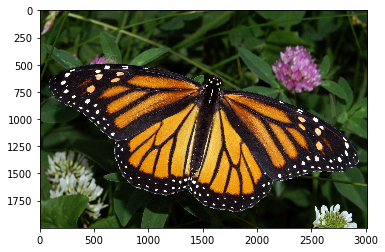

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

from matplotlib import animation, rc
from IPython.display import HTML

# Read in the image
## TODO: Check out the images directory to see other images you can work with
# And select one!
image = cv2.imread('images/monarch.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image);

In [3]:
image.shape

(2000, 3008, 3)

### Prepare data for k-means

In [4]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
pixel_vals.shape

(6016000, 3)

In [0]:
# Convert to float type
pixel_vals = np.float32(pixel_vals)

### Implement k-means clustering

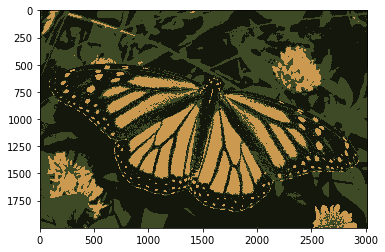

In [0]:
# define stopping criteria
# you can change the number of max iterations for faster convergence!
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

## TODO: Select a value for k
# then perform k-means clustering
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image);

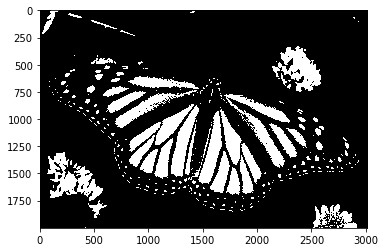

In [0]:
## TODO: Visualize one segment, try to find which is the leaves (1), background (2), other colors (0), etc!
plt.imshow(labels_reshape==0, cmap='gray');

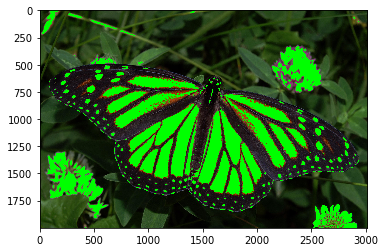

In [0]:
# mask an image segment by cluster

cluster = 0 # the first cluster

masked_image = np.copy(image)

# turn the mask green!
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image);